In [21]:
from scipy.io import wavfile
from scipy.fft import fft, ifft

import matplotlib.pyplot as plt

In [12]:
_, sound_1 = wavfile.read("sound_1.wav")
_, sound_2 = wavfile.read("sound_2.wav")

<ipython-input-12-c3ab1e79f4ea>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, sound_1 = wavfile.read("sound_1.wav")
<ipython-input-12-c3ab1e79f4ea>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, sound_2 = wavfile.read("sound_2.wav")


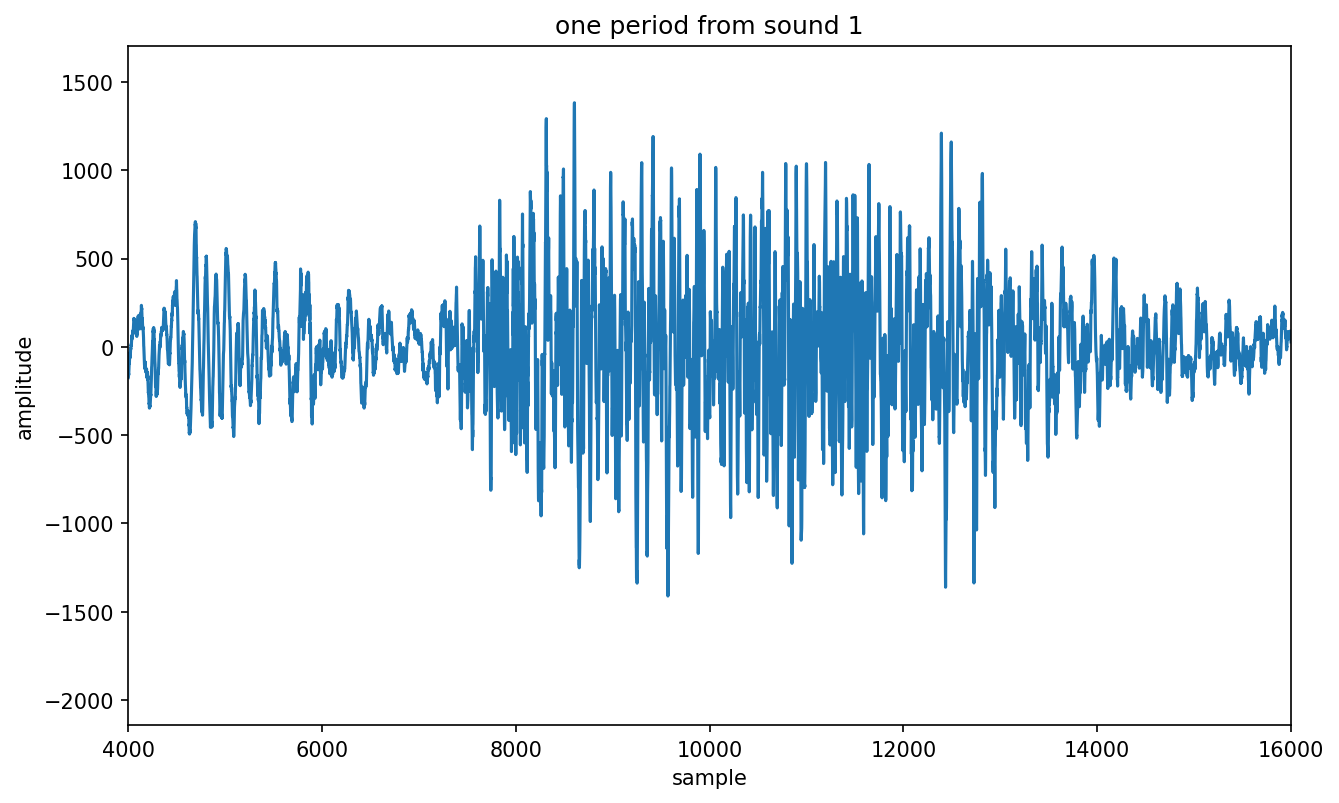

In [99]:
plt.figure(figsize=(10, 6), dpi=150)
plt.plot(sound_1)
plt.xlim(4000, 16000)
plt.title("one period from sound 1")
plt.xlabel("sample")
plt.ylabel("amplitude")
plt.show()

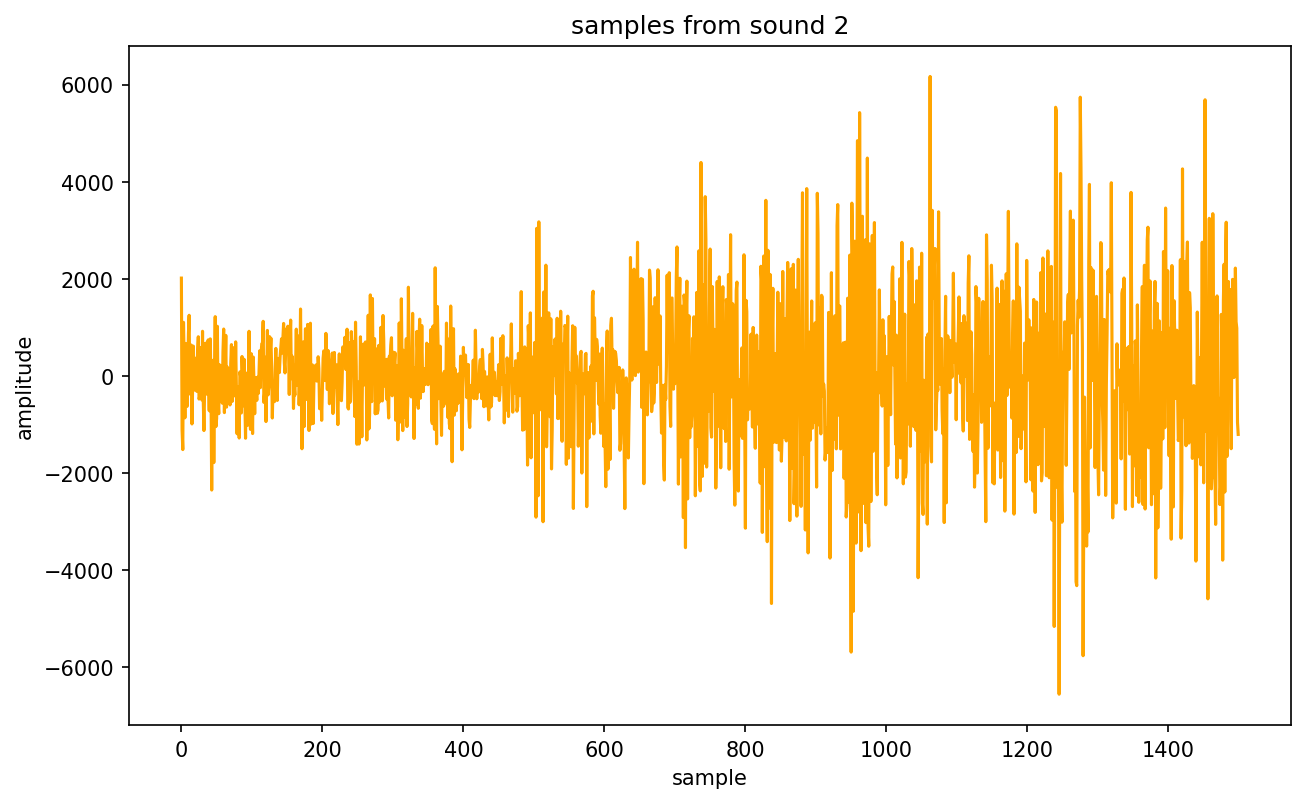

In [110]:
plt.figure(figsize=(10, 6), dpi=150)
plt.plot(sound_2[56000:57500], c="orange")
plt.title("samples from sound 2")
plt.xlabel("sample")
plt.ylabel("amplitude")
plt.show()

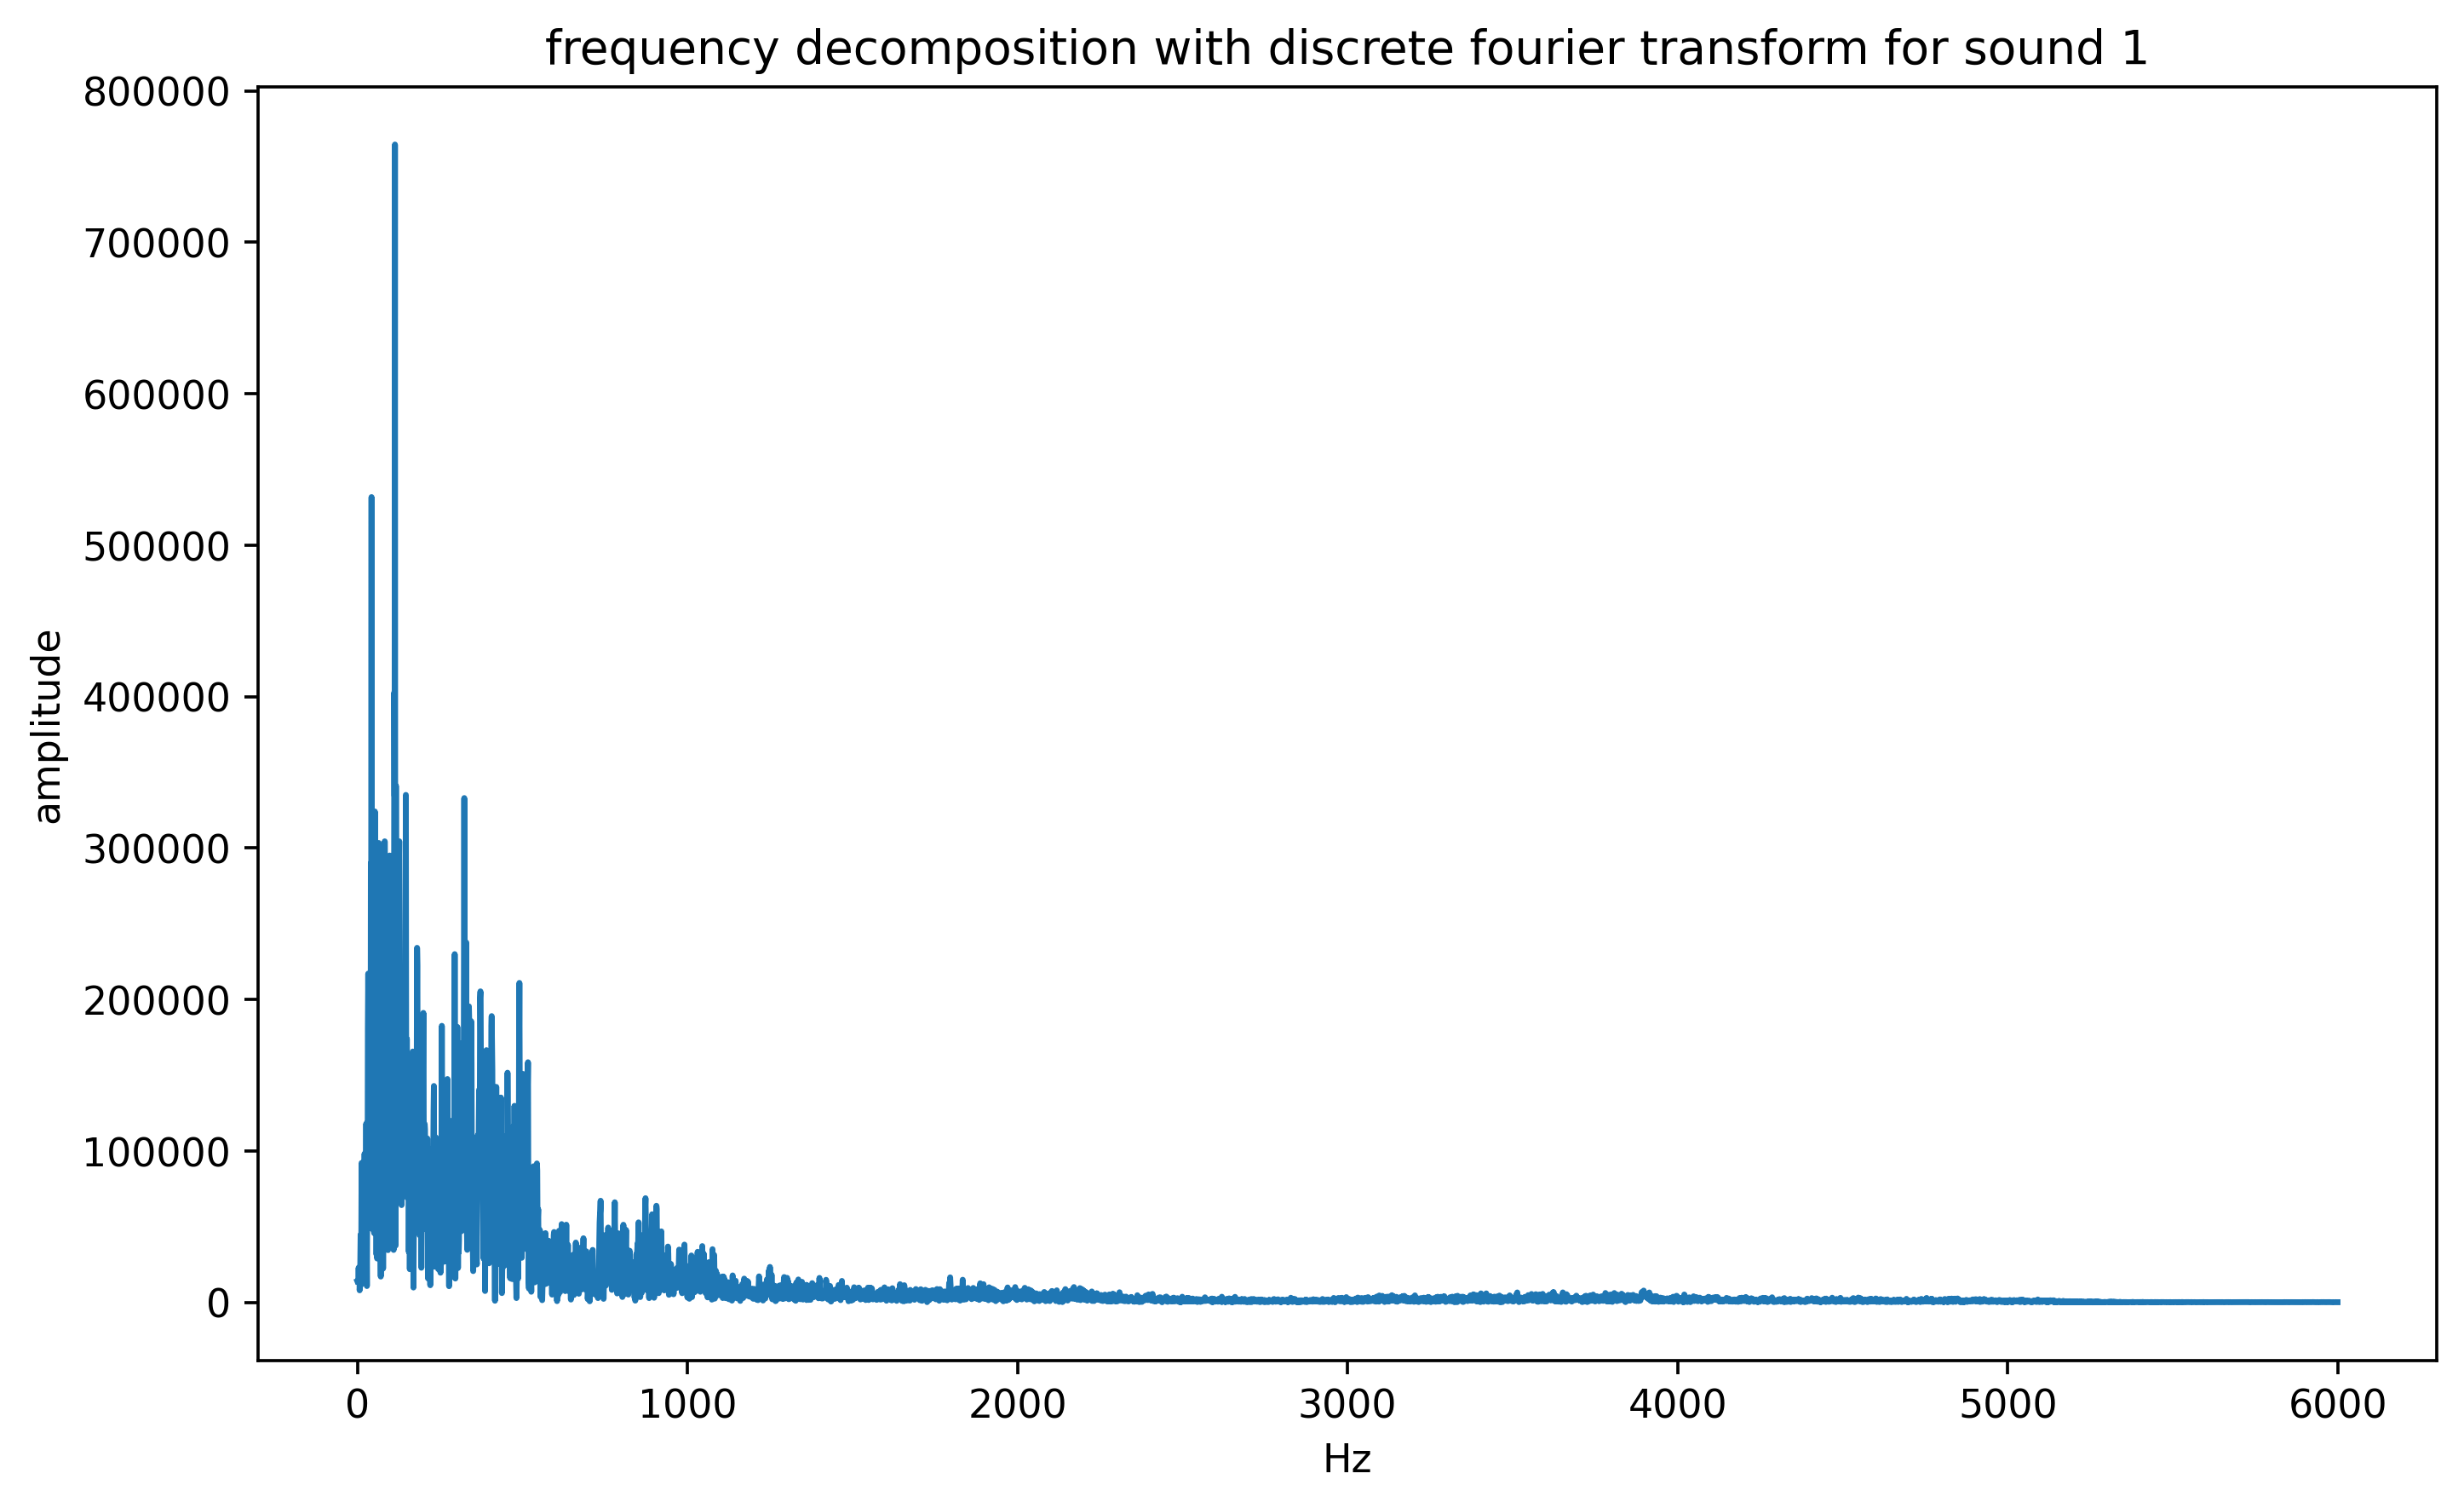

In [101]:
trans_1 = fft(sound_1[4000:16000])
plt.figure(figsize=(10, 6), dpi=330)
plt.plot(abs(trans_1)[:6000])
plt.ylabel("amplitude")
plt.xlabel("Hz")
plt.title("frequency decomposition with discrete fourier transform for sound 1")
plt.show()

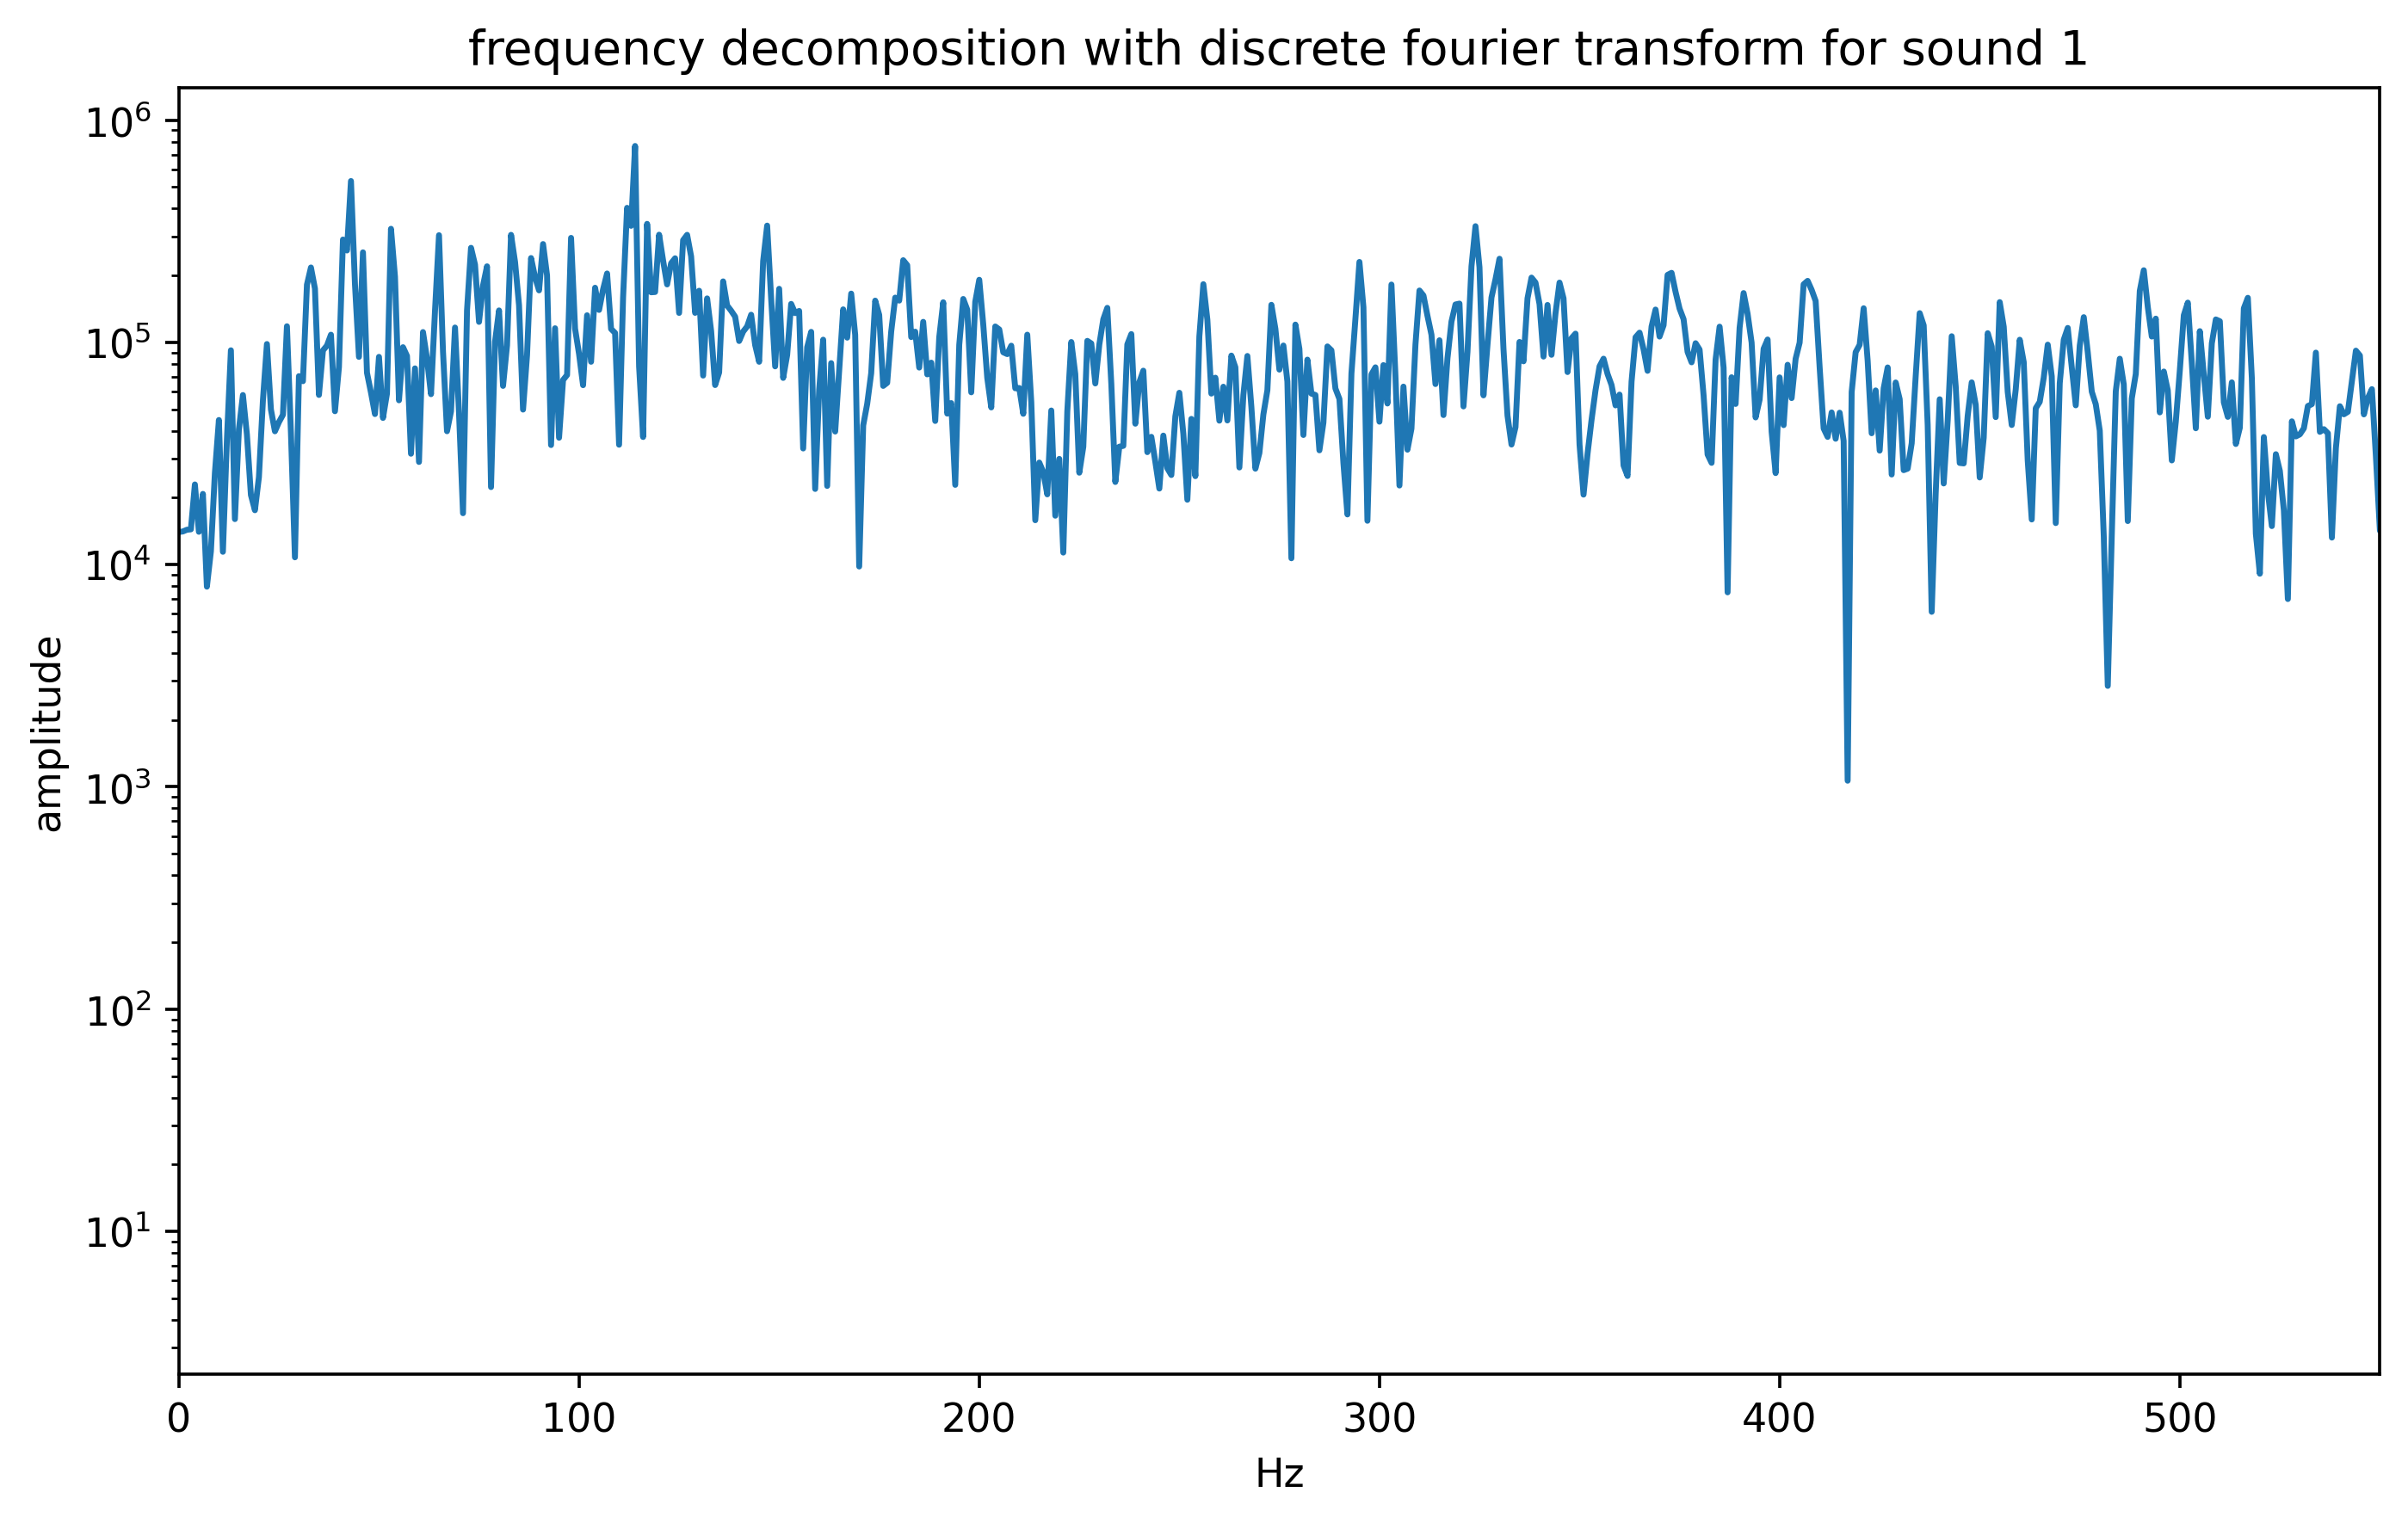

In [103]:
# trans_1 = fft(sound_1)
plt.figure(figsize=(10, 6), dpi=330)
plt.plot(abs(trans_1))
plt.ylabel("amplitude")
plt.xlabel("Hz")
plt.axvline(32000, color="red", linestyle="--")
plt.axvline(59000, color="red", linestyle="--")
plt.yscale("log")
plt.xlim(0, 550)
plt.title("frequency decomposition with discrete fourier transform for sound 1")
plt.show()

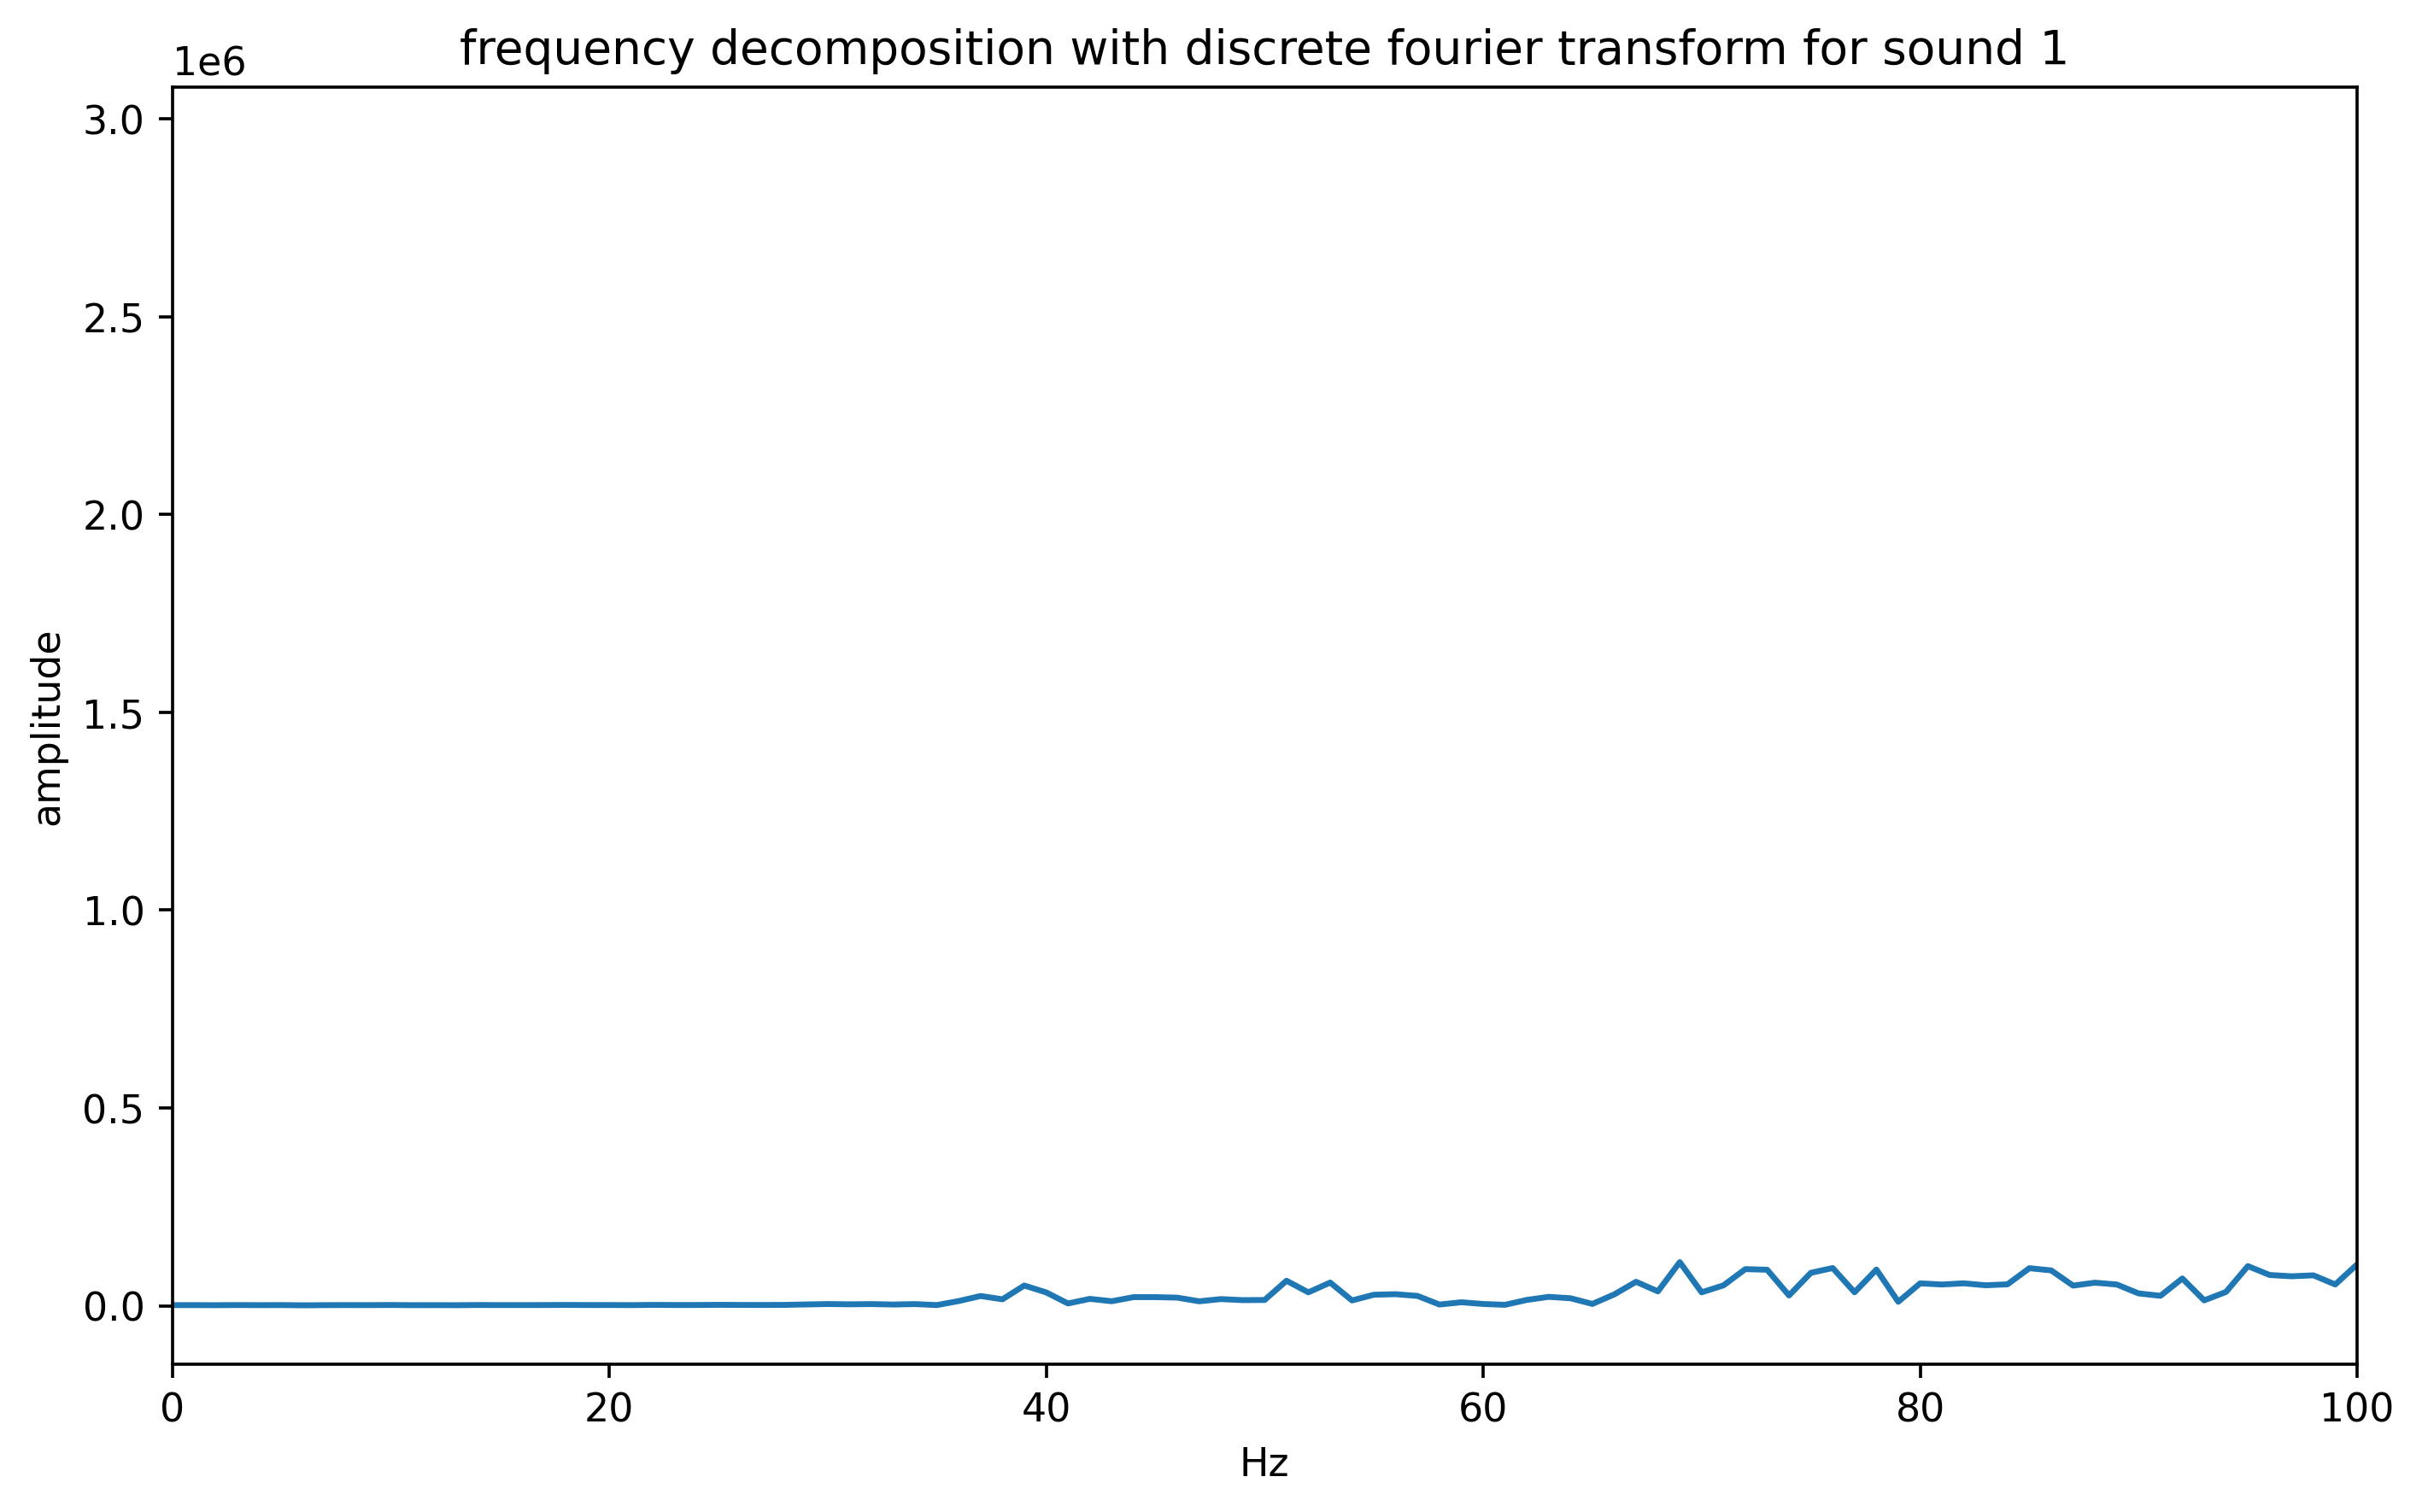

In [91]:
trans_1 = fft(sound_1)
plt.figure(figsize=(10, 6), dpi=330)
plt.plot(abs(trans_1))
plt.ylabel("amplitude")
plt.xlabel("Hz")
plt.axvline(32000, color="red", linestyle="--")
plt.axvline(59000, color="red", linestyle="--")
plt.xlim(0, 100)
plt.title("frequency decomposition with discrete fourier transform for sound 1")
plt.show()

In [98]:
idx_trans_1 = zip(abs(trans_1[:6000]), range(len(trans_1)))
sorted_trans_1 = sorted(idx_trans_1, reverse=True)
sorted_trans_1[:10]

[(764569.4289173867, 114),
 (531765.34046206, 43),
 (402804.72123312356, 112),
 (341174.771766939, 117),
 (335093.05106240103, 147),
 (334279.6043627892, 113),
 (333018.8743507399, 324),
 (324174.8729508611, 53),
 (304890.2022258262, 120),
 (304472.18939965713, 127)]

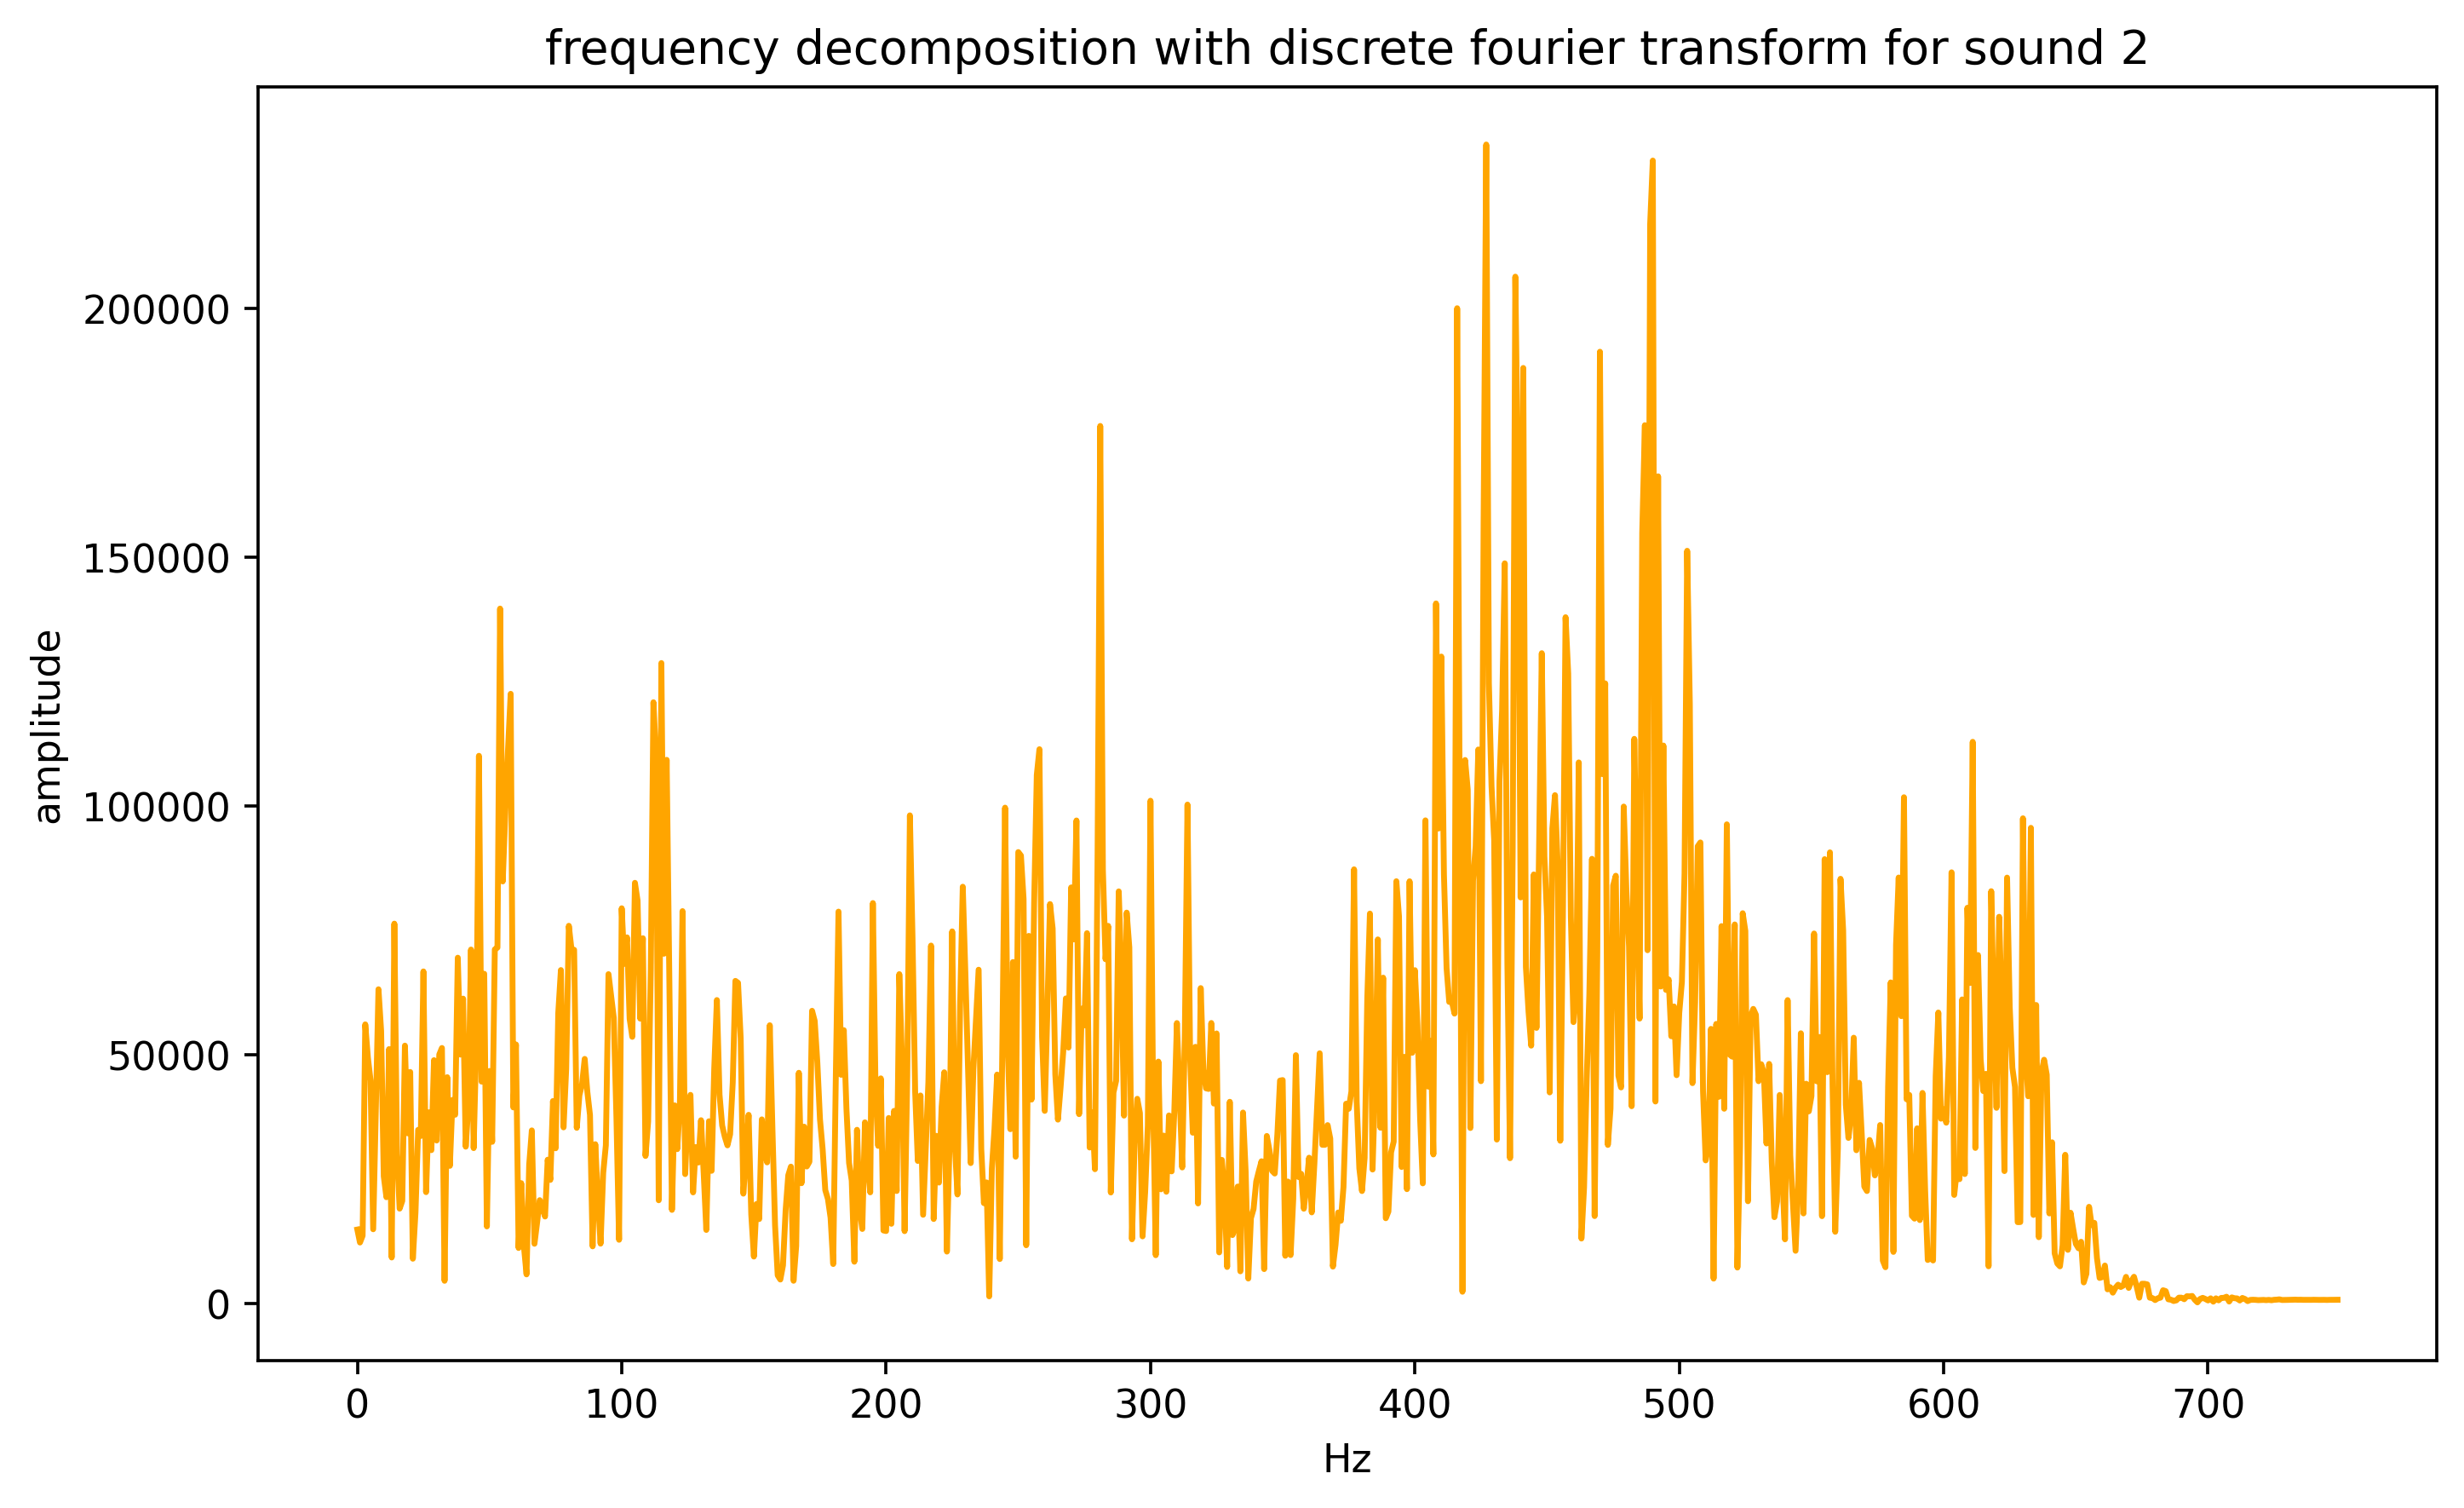

In [113]:
trans_2 = fft(sound_2[56000:57500])
plt.figure(figsize=(10, 6), dpi=330)
plt.plot(abs(trans_2)[:len(trans_2) // 2], color="orange")
plt.ylabel("amplitude")
plt.xlabel("Hz")
plt.title("frequency decomposition with discrete fourier transform for sound 2")
plt.show()

In [114]:
idx_trans_2 = zip(abs(trans_2[:700]), range(len(trans_2)))
sorted_trans_2 = sorted(idx_trans_2, reverse=True)
sorted_trans_2[:10]

[(232969.10052924557, 427),
 (229745.1743945484, 490),
 (217013.21743549325, 489),
 (206416.80057919776, 438),
 (200075.47598178548, 416),
 (191330.33760727773, 470),
 (188068.74661532085, 441),
 (176572.35497366183, 487),
 (176416.59952820026, 281),
 (166295.72596574787, 492)]